# Prepare the data for the modeling

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
input_file = './data/npv_surface_40_40_1.dat'

In [6]:
input_df = pd.read_csv(input_file, header=None, names=['f(x)'])

In [7]:
input_df

,f(x)
0,8.342349
1,9.585238
2,12.001880
3,11.961410
4,11.420570
...,...
1595,26.635980
1596,21.991700
1597,20.292110
1598,20.181530


# Add the spatial variables

The grid is uniform 40x40 and we use that information to define the (i,j) grid values


In [8]:
import itertools
from typing import Tuple, List

In [9]:
# product() is equivalent to nested for loops, yields a generator

In [10]:
# grid = itertools.product(range(1,41), range(1, 41), repeat=1)

In [11]:
# But we will use a loop format instead for simplicitY
NUM_COLS, NUM_ROWS = 40, 40

def get_1d_index(i, j):
    return (i - 1) + (j - 1) * NUM_ROWS
    
def generate_grid(num_rows:int, num_cols:int) -> Tuple[List[int], List[int], List[int]]:
    total_cells = num_rows * num_cols
    x_vals = [0] * total_cells
    y_vals = [0] * total_cells 
    index_1d = [0] * total_cells
    for i in range(1, num_rows + 1):
        for j in range(1, num_cols + 1): 
            index = (i-1) + (j-1) * num_rows
            x_vals[index] = i
            y_vals[index] = j
            index_1d[index] = index

    return x_vals, y_vals, index_1d
    

In [12]:
x_vals, y_vals, index_1d = generate_grid(num_rows=40, num_cols=40)

In [13]:
input_df['i'] = x_vals
input_df['j'] = y_vals
input_df['1d'] = index_1d

In [14]:
# reorder the columnes
input_df = input_df[['i','j','1d','f(x)']]

In [15]:
input_df

,i,j,1d,f(x)
0,1,1,0,8.342349
1,2,1,1,9.585238
2,3,1,2,12.001880
3,4,1,3,11.961410
4,5,1,4,11.420570
...,...,...,...,...
1595,36,40,1595,26.635980
1596,37,40,1596,21.991700
1597,38,40,1597,20.292110
1598,39,40,1598,20.181530


In [16]:
# get the maximum objective function
max(input_df['f(x)'])

266.1815

In [17]:
# confirm the objective function at grid (20,20) is the maximum = 266.1815
input_df.loc[get_1d_index(20,20)]

i        20.0000
j        20.0000
1d      779.0000
f(x)    266.1815
Name: 779, dtype: float64

# Derive categorical values for f(x)

In [83]:
num_bins = [2, 5, 10, 20, 50, 100]


def get_cut_binning(f_values, num_bins):
    """Choose the bins to be evenly spaced not by values, but get different number of records in each bin"""
    df = pd.cut(f_values, num_bins, labels=range(1, num_bins+1))
    plt.figure()
    df.hist()
    return df

def get_qcut_binning(f_values, num_bins):
    """Choose the bins so that we have the same number of records in each bin."""
    df = pd.qcut(f_values, num_bins, labels=range(1, num_bins+1))
    plt.figure()
    df.hist()
    return df #alues, num_bins, labels=range(1, num_bins+1))
             
def add_categorical_labels(df):
    # add the cut_equal
    for num_bin in num_bins:
        col_name = f'fx_cut_{num_bin}'
        df.loc[:, col_name] = get_cut_binning(df['f(x)'], num_bin)
    # add the qcut labels
    for num_bin in num_bins:
        col_name = f'fx_qcut_{num_bin}'
        df.loc[:, col_name] = get_qcut_binning(df['f(x)'], num_bin)

    return df

    

0       1
1       1
2       1
3       1
4       1
       ..
1595    1
1596    1
1597    1
1598    1
1599    1
Name: f(x), Length: 1600, dtype: category
Categories (2, int64): [1 < 2]

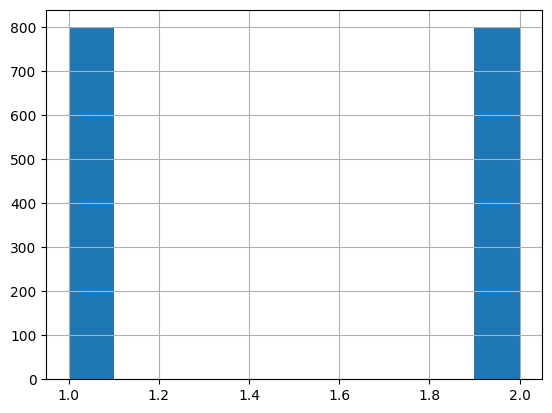

In [82]:
get_qcut_binning(fx, 2)

/tmp/ipykernel_27538/3397770705.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_name] = get_cut_binning(df['f(x)'], num_bin)
/tmp/ipykernel_27538/3397770705.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_name] = get_qcut_binning(df['f(x)'], num_bin)


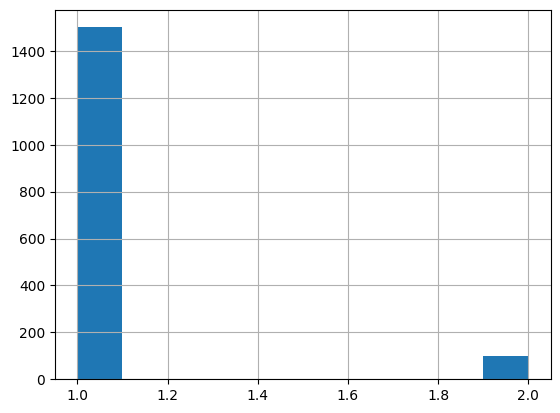

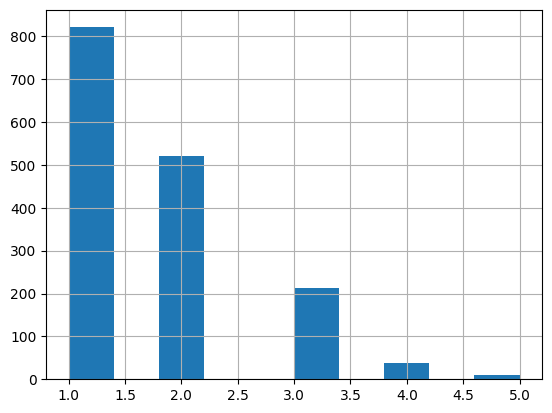

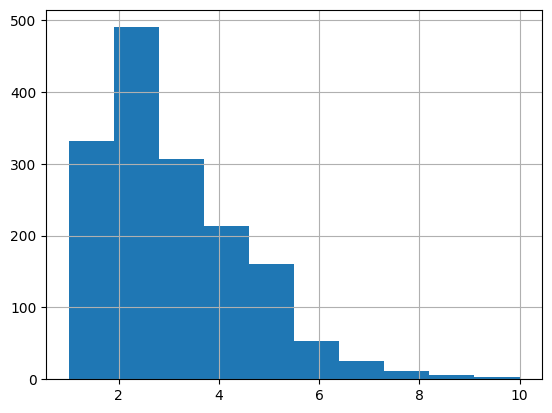

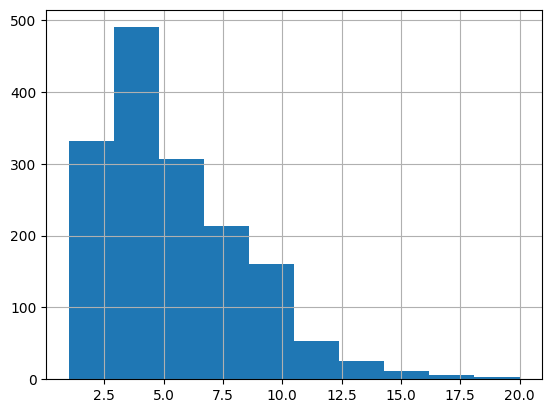

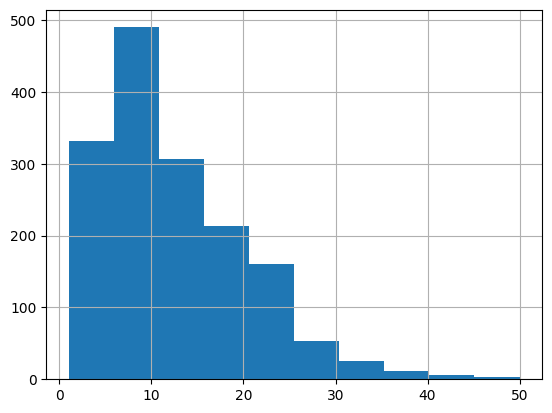

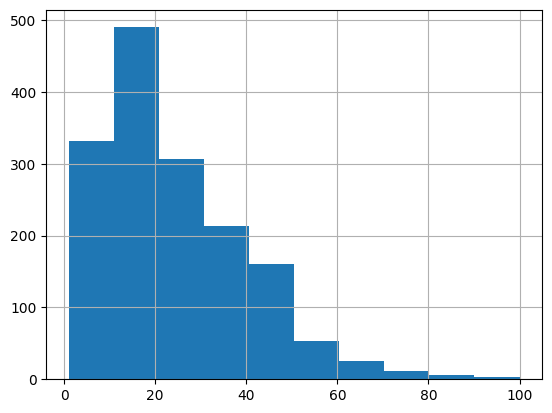

In [71]:
model_df = add_categorical_labels(input_df)

In [72]:
model_df

,i,j,1d,f(x),fx_cut_2,fx_cut_10,fx_cut_20,fx_cut_50,fx_qcut_2,fx_qcut_10,fx_qcut_20,fx_qcut_50,fx_cut_5,fx_qcut_5,fx_cut_100,fx_qcut_100
0,1,1,0,8.342349,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,9.585238,1,1,1,1,1,1,1,1,1,1,1,1
2,3,1,2,12.001880,1,1,1,1,1,1,1,1,1,1,2,2
3,4,1,3,11.961410,1,1,1,1,1,1,1,1,1,1,2,2
4,5,1,4,11.420570,1,1,1,1,1,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,36,40,1595,26.635980,1,1,2,4,1,2,3,7,1,1,8,14
1596,37,40,1596,21.991700,1,1,2,3,1,1,2,5,1,1,6,10
1597,38,40,1597,20.292110,1,1,2,3,1,1,2,4,1,1,6,8
1598,39,40,1598,20.181530,1,1,2,3,1,1,2,4,1,1,6,8


In [73]:
col_names = [f'fx_cut_{num_bin}' for num_bin in num_bins] # [2, 10, 10, 20, 50]]
col_names +=[f'fx_qcut_{num_bin}' for num_bin in num_bins] #[2, 10, 10, 20, 50]]


In [74]:
fdf = model_df[col_names]
fdf

,fx_cut_2,fx_cut_5,fx_cut_10,fx_cut_20,fx_cut_50,fx_cut_100,fx_qcut_2,fx_qcut_5,fx_qcut_10,fx_qcut_20,fx_qcut_50,fx_qcut_100
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,2,1,1,1,1,1,2
3,1,1,1,1,1,2,1,1,1,1,1,2
4,1,1,1,1,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,1,1,2,4,8,1,1,2,3,7,14
1596,1,1,1,2,3,6,1,1,1,2,5,10
1597,1,1,1,2,3,6,1,1,1,2,4,8
1598,1,1,1,2,3,6,1,1,1,2,4,8


In [75]:
fdf_melted = fdf.melt(var_name='column')
fdf_melted

,column,value
0,fx_cut_2,1
1,fx_cut_2,1
2,fx_cut_2,1
3,fx_cut_2,1
4,fx_cut_2,1
...,...,...
19195,fx_qcut_100,14
19196,fx_qcut_100,10
19197,fx_qcut_100,8
19198,fx_qcut_100,8


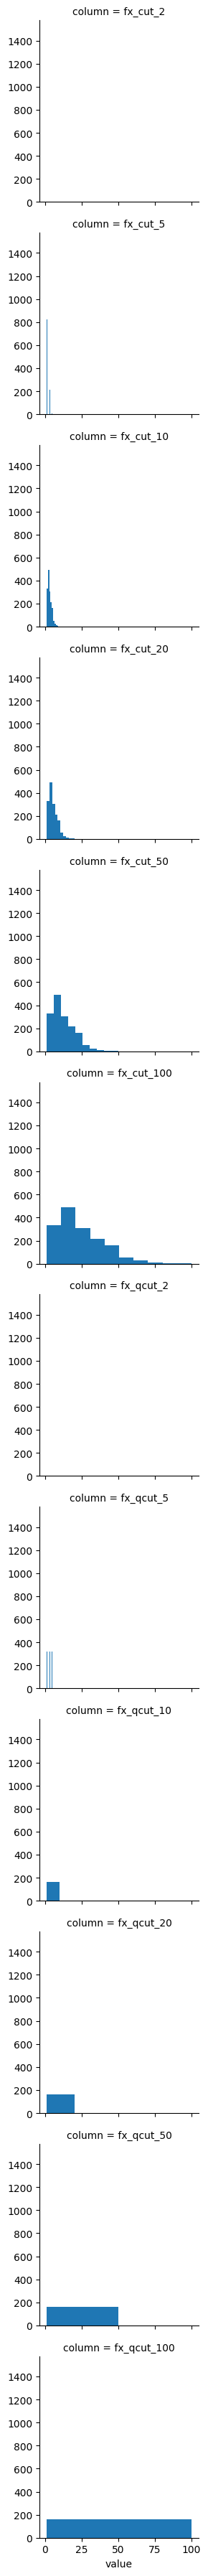

In [76]:
g = sns.FacetGrid(fdf_melted, row='column')
g.map(plt.hist, 'value')